# **Assignment-04-Simple Linear Regression-2**

# **Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.**

**Salary hike - Build a prediction model for salary hike**

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (5,3)
plt.rcParams['figure.dpi'] = 200

In [22]:
dataset = pd.read_csv('/content/Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA and Data Visualization

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Visualizing The Data

<Axes: xlabel='Salary', ylabel='Density'>

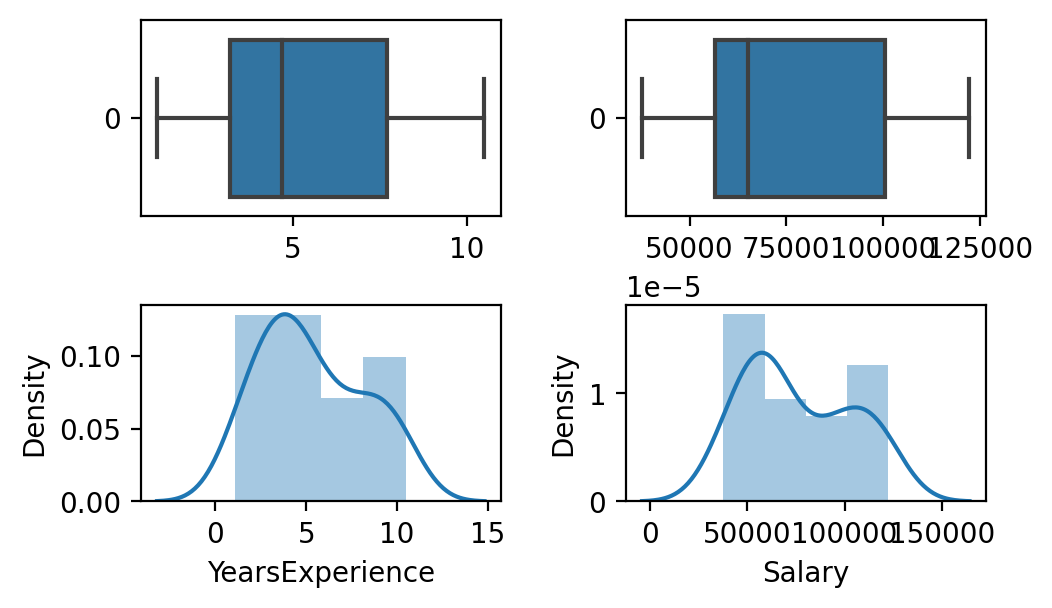

In [24]:
fig, ax = plt.subplots(2,2)
plt.tight_layout()

sns.boxplot(dataset['YearsExperience'], ax = ax[0,0],orient='h')
sns.boxplot(dataset['Salary'], ax = ax[0,1],orient='h')
sns.distplot(dataset['YearsExperience'], ax = ax[1,0])
sns.distplot(dataset['Salary'], ax = ax[1,1])

# Correlation Analysis

In [28]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

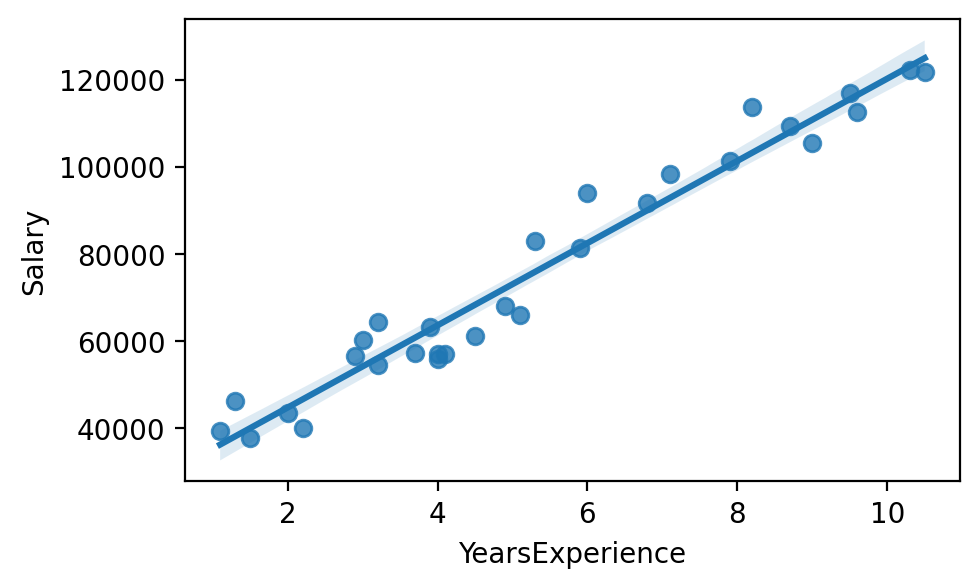

In [29]:
sns.regplot(x=dataset['YearsExperience'], y=dataset['Salary'])

# **Transforming The Data**

Log Transformation

In [44]:
dataset['log_YearsExperience'] = np.log(dataset['YearsExperience'])
dataset['log_Salary'] = np.log(dataset['Salary'])

dataset.head()

,YearsExperience,Salary,log_YearsExperience,log_Salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906


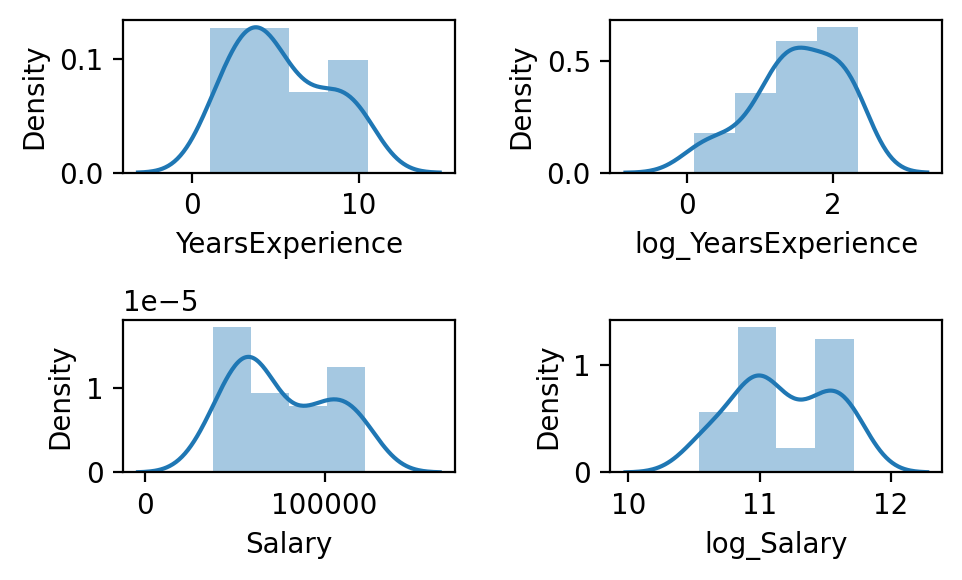

In [45]:
fig, ax = plt.subplots(2,2)

sns.distplot(dataset['YearsExperience'], ax = ax[0,0])
sns.distplot(dataset['log_YearsExperience'], ax = ax[0,1])
sns.distplot(dataset['Salary'], ax = ax[1,0])
sns.distplot(dataset['log_Salary'], ax = ax[1,1])
plt.tight_layout()

# **Sqrt Transformation**

In [46]:
dataset['sqrt_YearsExperience'] = np.sqrt(dataset['YearsExperience'])
dataset['sqrt_Salary'] = np.sqrt(dataset['Salary'])

dataset.head()

,YearsExperience,Salary,log_YearsExperience,log_Salary,sqrt_YearsExperience,sqrt_Salary
0,1.1,39343.0,0.095310,10.580073,1.048809,198.350700
1,1.3,46205.0,0.262364,10.740843,1.140175,214.953483
2,1.5,37731.0,0.405465,10.538237,1.224745,194.244691
3,2.0,43525.0,0.693147,10.681091,1.414214,208.626460
4,2.2,39891.0,0.788457,10.593906,1.483240,199.727314


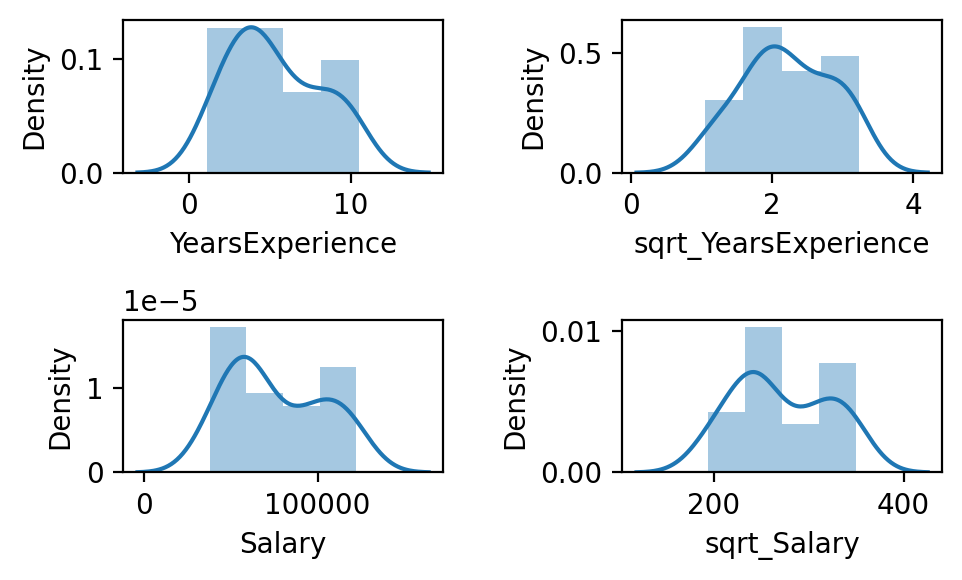

In [47]:
fig, ax = plt.subplots(2,2)

sns.distplot(dataset['YearsExperience'], ax = ax[0,0])
sns.distplot(dataset['sqrt_YearsExperience'], ax = ax[0,1])
sns.distplot(dataset['Salary'], ax = ax[1,0])
sns.distplot(dataset['sqrt_Salary'], ax = ax[1,1])
plt.tight_layout()

# **Building Model From The Data**

# Creating Model With Orignal Data

In [48]:
org_model = smf.ols('YearsExperience~Salary', data=dataset).fit()

In [49]:
print('\n T-Value of model wtin orignal value', '\n', org_model.tvalues)
print('\n P-Value of model wtin orignal value', '\n', org_model.pvalues)


 T-Value of model wtin orignal value 
 Intercept    -7.281283
Salary       24.950094
dtype: float64

 P-Value of model wtin orignal value 
 Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


In [50]:
org_model.rsquared

0.9569566641435086

As accuracy of the model with orignal data is fine, we can retain are model with orignal data.

# **Creating Model With Sqrt Data**

In [51]:
sqrt_model = smf.ols('sqrt_YearsExperience~sqrt_Salary', data=dataset).fit()

In [52]:
print('\n T-Value of model wtin log value', '\n', org_model.tvalues)
print('\n P-Value of model wtin log value', '\n', org_model.pvalues)


 T-Value of model wtin log value 
 Intercept    -7.281283
Salary       24.950094
dtype: float64

 P-Value of model wtin log value 
 Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


In [53]:
sqrt_model.rsquared

0.9419490138976826

As we used sqrt data the accuracy of ar model decreased from 96% to 94%, so we will not use sqrt model as final model.

# **Creating Model With Log Data**

In [54]:
log_model = smf.ols('log_YearsExperience~log_Salary', data=dataset).fit()

In [55]:
print('\n T-Value of model wtin log value', '\n', org_model.tvalues)
print('\n P-Value of model wtin log value', '\n', org_model.pvalues)


 T-Value of model wtin log value 
 Intercept    -7.281283
Salary       24.950094
dtype: float64

 P-Value of model wtin log value 
 Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


In [56]:
log_model.rsquared

0.9052150725817153

As we used log data the accuracy of ar model decreased from 96% to 90%, so we will using model with orignal data as final model.